In [1]:
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import discriminant_analysis
from sklearn import naive_bayes
from sklearn import metrics
from sklearn import neighbors
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

14. In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.

In [190]:
df = sns.load_dataset('mpg')
year = df['model_year'].copy()
df = df.set_index(['model_year','name'])
df['model_year'] = year.values
df['origin'] = pd.Categorical(df['origin']).codes
df = df[~df.index.duplicated()]

In [191]:
df

mpg  cylinders  displacement  \
model_year name                                                       
70         chevrolet chevelle malibu  18.0          8         307.0   
           buick skylark 320          15.0          8         350.0   
           plymouth satellite         18.0          8         318.0   
           amc rebel sst              16.0          8         304.0   
           ford torino                17.0          8         302.0   
...                                    ...        ...           ...   
82         ford mustang gl            27.0          4         140.0   
           vw pickup                  44.0          4          97.0   
           dodge rampage              32.0          4         135.0   
           ford ranger                28.0          4         120.0   
           chevy s-10                 31.0          4         119.0   

                                      horsepower  weight  acceleration  \
model_year name                                                          
70         chevrolet chevelle malibu       130.0    3504          12.0   
           buick skylark 320               165.0    3693          11.5   
           plymouth satellite              150.0    3436          11.0   
           amc rebel sst                   150.0    3433          12.0   
           ford torino                     140.0    3449          10.5   
...                                          ...     ...           ...   
82         ford mustang gl                  86.0    2790          15.6   
           vw pickup                        52.0    2130          24.6   
           dodge rampage                    84.0    2295          11.6   
           ford ranger                      79.0    2625          18.6   
           chevy s-10                       82.0    2720          19.4   

                                      origin  model_year  
model_year name                                           
70         chevrolet chevelle malibu       2          70  
           buick skylark 320               2          70  
           plymouth satellite              2          70  
           amc rebel sst                   2          70  
           ford torino                     2          70  
...                                      ...         ...  
82         ford mustang gl                 2          82  
           vw pickup                       0          82  
           dodge rampage                   2          82  
           ford ranger                     2          82  
           chevy s-10                      2          82  

[396 rows x 8 columns]

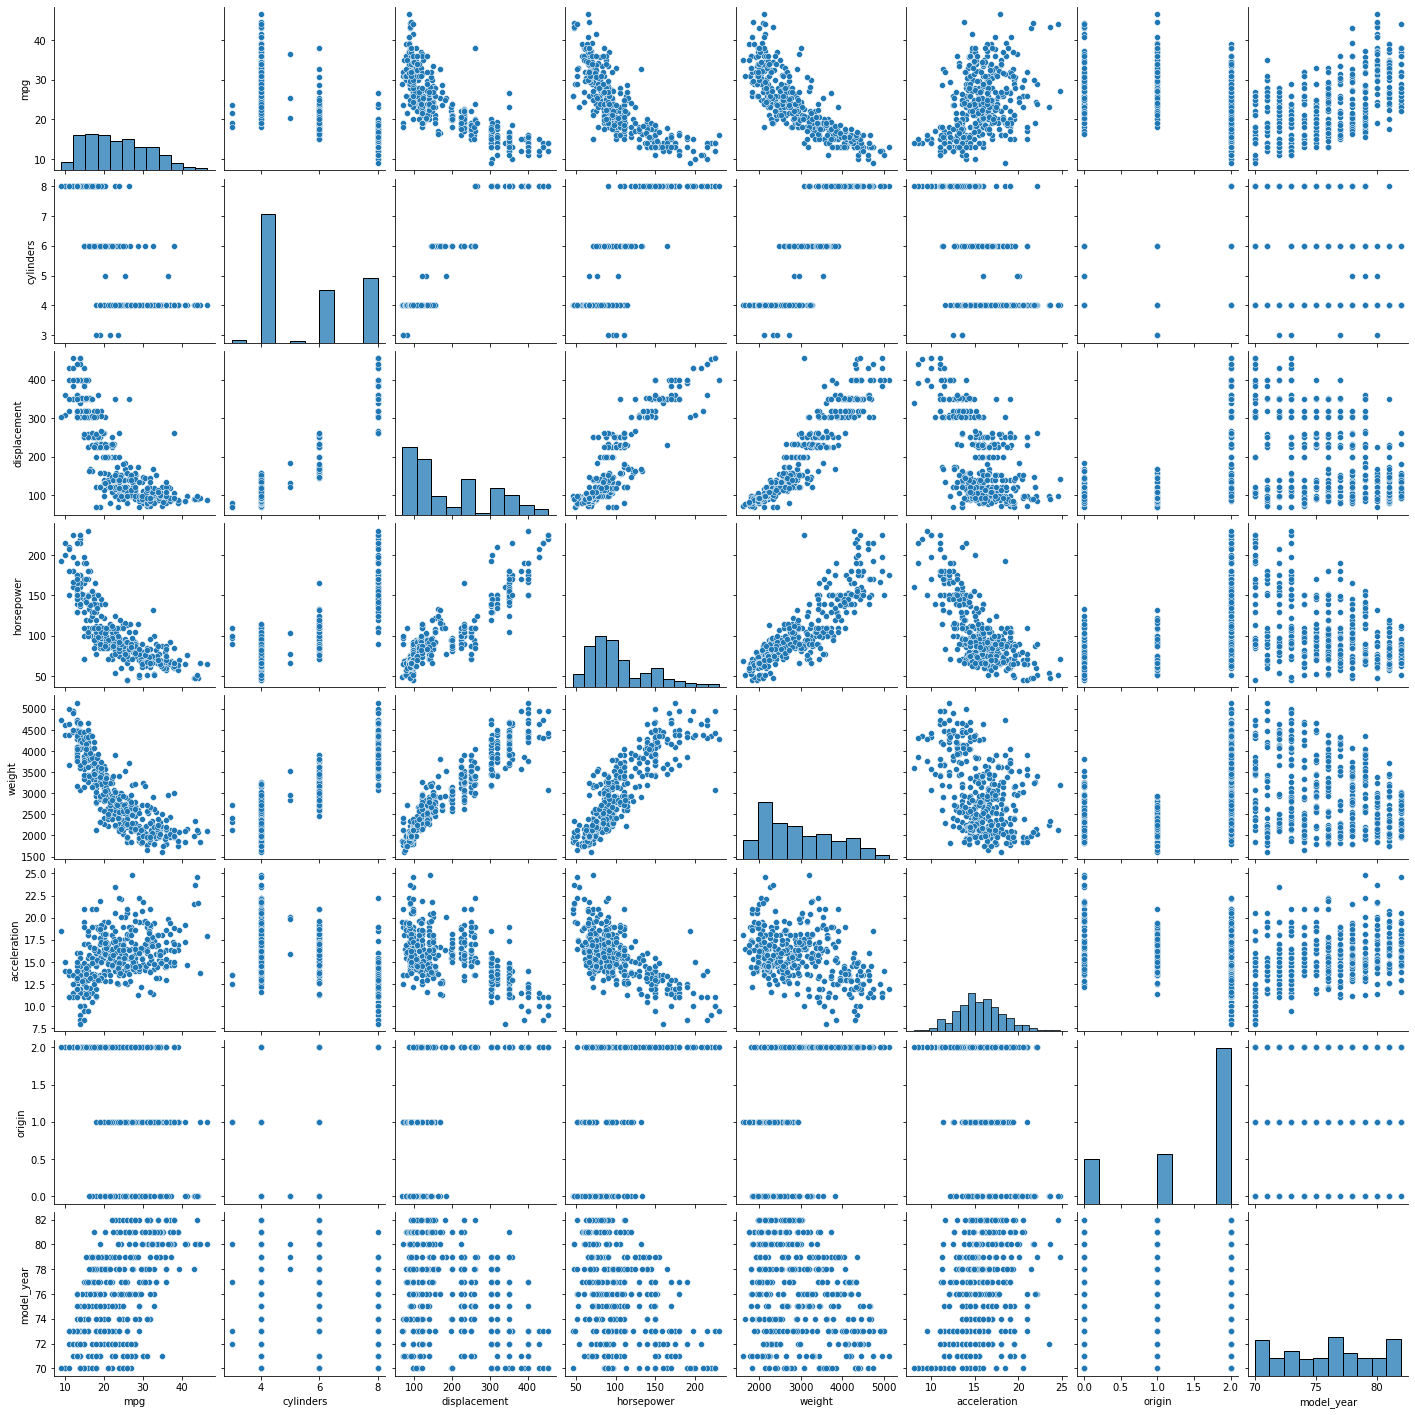

In [173]:
sns.pairplot(df)

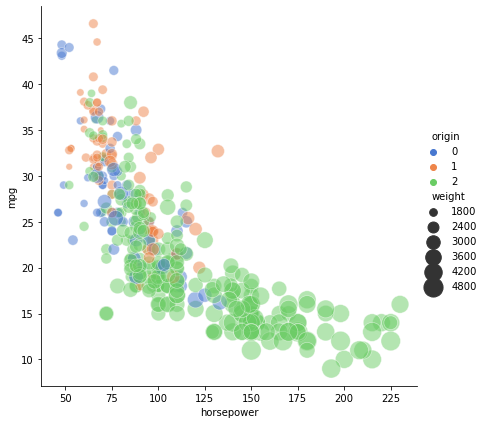

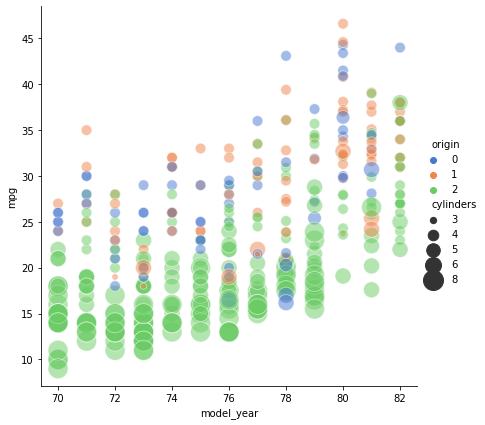

In [174]:
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)
sns.relplot(x="model_year", y="mpg", hue="origin", size="cylinders",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
function. Note you may find it helpful to use the data.frame()
function to create a single data set containing both mpg01 and
the other Auto variables.

In [175]:
med_val = df.loc[:, 'mpg'].median()
df['mpg01'] = (df['mpg'] > med_val).astype('int')
df = df.drop('mpg', axis=1)
df

cylinders  displacement  horsepower  \
model_year name                                                             
70         chevrolet chevelle malibu          8         307.0       130.0   
           buick skylark 320                  8         350.0       165.0   
           plymouth satellite                 8         318.0       150.0   
           amc rebel sst                      8         304.0       150.0   
           ford torino                        8         302.0       140.0   
...                                         ...           ...         ...   
82         ford mustang gl                    4         140.0        86.0   
           vw pickup                          4          97.0        52.0   
           dodge rampage                      4         135.0        84.0   
           ford ranger                        4         120.0        79.0   
           chevy s-10                         4         119.0        82.0   

                                      weight  acceleration  origin  \
model_year name                                                      
70         chevrolet chevelle malibu    3504          12.0       2   
           buick skylark 320            3693          11.5       2   
           plymouth satellite           3436          11.0       2   
           amc rebel sst                3433          12.0       2   
           ford torino                  3449          10.5       2   
...                                      ...           ...     ...   
82         ford mustang gl              2790          15.6       2   
           vw pickup                    2130          24.6       0   
           dodge rampage                2295          11.6       2   
           ford ranger                  2625          18.6       2   
           chevy s-10                   2720          19.4       2   

                                      model_year  mpg01  
model_year name                                          
70         chevrolet chevelle malibu          70      0  
           buick skylark 320                  70      0  
           plymouth satellite                 70      0  
           amc rebel sst                      70      0  
           ford torino                        70      0  
...                                          ...    ...  
82         ford mustang gl                    82      1  
           vw pickup                          82      1  
           dodge rampage                      82      1  
           ford ranger                        82      1  
           chevy s-10                         82      1  

[396 rows x 8 columns]

(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

<AxesSubplot:xlabel='origin', ylabel='mpg01'>

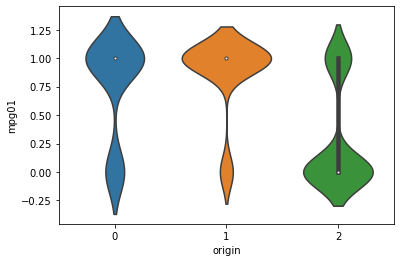

In [176]:
sns.violinplot(x='origin', y='mpg01', data=df)

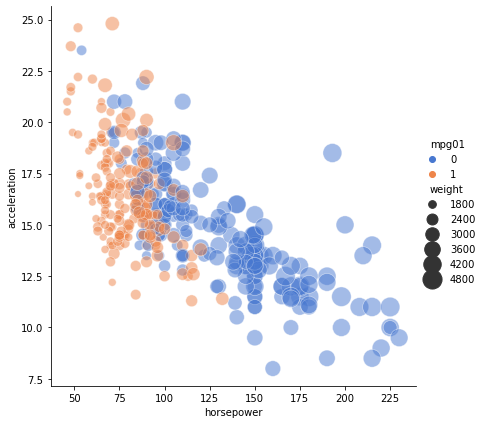

In [177]:
sns.relplot(x="horsepower", y="acceleration", hue="mpg01", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

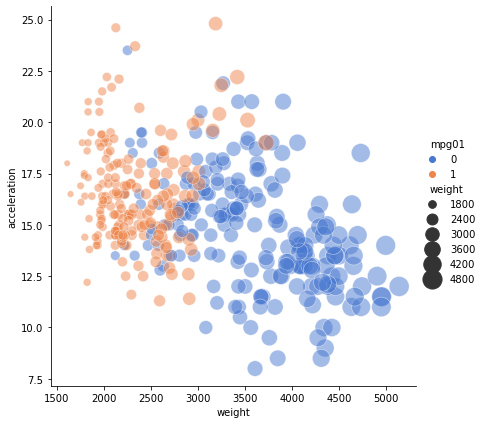

In [178]:
sns.relplot(x="weight", y="acceleration", hue="mpg01", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

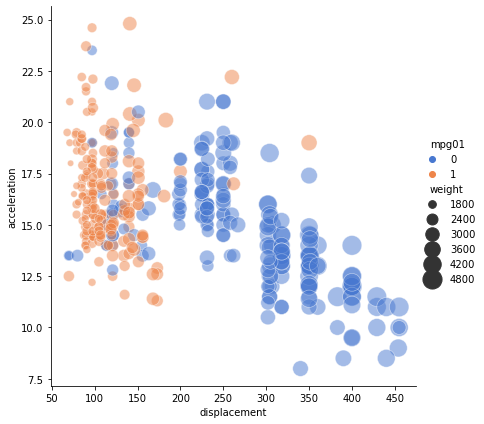

In [179]:
sns.relplot(x="displacement", y="acceleration", hue="mpg01", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

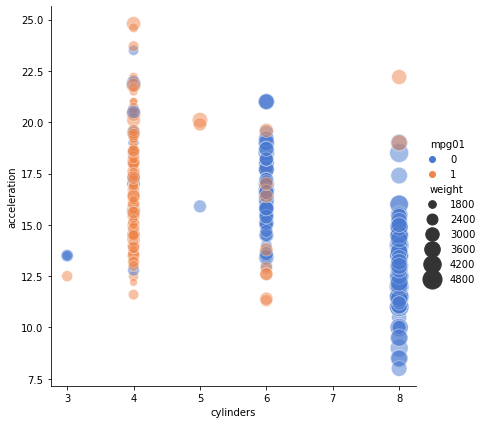

In [180]:
sns.relplot(x="cylinders", y="acceleration", hue="mpg01", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

(c) Split the data into a training set and a test set.

In [201]:
df = sns.load_dataset('mpg')
year = df['model_year'].copy()
df = df.set_index(['model_year','name'])
df['model_year'] = year.values
df['origin'] = pd.Categorical(df['origin']).codes
df = df[~df.index.duplicated()]
med_val = df.loc[:, 'mpg'].median()
df['mpg01'] = (df['mpg'] > med_val).astype('int')
df = df.drop('mpg', axis=1)

In [210]:
df = df.dropna()#.drop(['origin','weight', 'cylinders'], axis=1) #arguably - all parameters seem to have some effect on mpg
y = df['mpg01']
X = df.drop('mpg01', axis=1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

(d) Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [203]:
#https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/
lda_res = discriminant_analysis.LinearDiscriminantAnalysis()
lda_res.fit(X_train,y_train)
y_pred = lda_res.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(metrics.accuracy_score(y_test, y_pred)))

[[29  7]
 [ 2 40]]
Accuracy 0.8846153846153846


(e) Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [204]:
#https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/
qda_res = discriminant_analysis.QuadraticDiscriminantAnalysis()
qda_res.fit(X_train,y_train)
y_pred_qda = qda_res.predict(X_test)
cm_qda = metrics.confusion_matrix(y_test, y_pred_qda)
print(cm_qda)
print('Accuracy ' + str(metrics.accuracy_score(y_test, y_pred_qda)))

[[29  7]
 [ 1 41]]
Accuracy 0.8974358974358975


(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?

In [205]:
#https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/
logi_res = linear_model.LogisticRegression(random_state=0)
logi_res.fit(X_train,y_train)
y_pred_logi = logi_res.predict(X_test)
cm_logi = metrics.confusion_matrix(y_test, y_pred_logi)
print(cm_qda)
print('Accuracy ' + str(metrics.accuracy_score(y_test, y_pred_logi)))
print(logi_res.score(X_test, y_test))

[[29  7]
 [ 1 41]]
Accuracy 0.8589743589743589
0.8589743589743589


(g) Perform naive Bayes on the training data in order to predict
mpg01 using the variables that seemed most associated with mpg01
in (b). What is the test error of the model obtained?

In [206]:
nb_res = naive_bayes.GaussianNB()
nb_res.fit(X_train,y_train)
y_pred_nb = nb_res.predict(X_test)
cm_nb = metrics.confusion_matrix(y_test, y_pred_nb)
print(cm_nb)
print('Accuracy ' + str(metrics.accuracy_score(y_test, y_pred_nb)))
print(nb_res.score(X_test, y_test))

[[28  8]
 [ 1 41]]
Accuracy 0.8846153846153846
0.8846153846153846


(h) Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

In [207]:
knn_res = neighbors.KNeighborsClassifier(n_neighbors=8)
knn_res.fit(X_train,y_train)
y_pred_knn = knn_res.predict(X_test)
cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
print(cm_knn)
print('Accuracy ' + str(metrics.accuracy_score(y_test, y_pred_knn)))
print(knn_res.score(X_test, y_test))

[[29  7]
 [ 5 37]]
Accuracy 0.8461538461538461
0.8461538461538461


In [208]:
#note - these models have similar accuracy (with LDA having highest); but they have different misclasification error types
#Type 1 vs Type 2

#Type 1 - telling a man he is pregnant (calling something positive when it's not)
#Type 2 - telling a woman who is pregnant that she is not (calling something negative when it's positive)

#LDA 7 upper right (PRed 1, actual 0) - Type 1 error
#LDA 0 botton left (Pred 0, actual 1) - Type 2 Error
#which model to choose could depend on consequences of either.

In [209]:
y_comp = pd.DataFrame(y_test.copy())
y_comp.loc[:, 'pred'] = y_pred
y_comp.values

array([[0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0,